# Data setting

In [4]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras import layers
# tf.__version__
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
student = pd.read_csv('./student_sentence_data.csv')
teacher = pd.read_csv('./teacher_sentence_data.csv')

Text(0.5, 0, 'same_question')

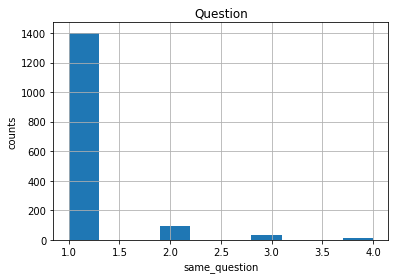

In [6]:
student['sentence'].value_counts().hist()
plt.title('Question')
plt.ylabel('counts')
plt.xlabel('same_question')

In [3]:
student

,sentence_id,sentence,answer,label
0,20df21b159a5e1d0ee484c936f1597ef,Suppose you need to measure the temperature in...,너는 농작물 밭에서 온도를 측정할 필요가 있다고 가정해라,1
1,1b90bfe67b06a515eec82e88e1bd7d84,There are different kinds of knowledge.,지식에는 다른 종류가 있다,1
2,2673ce8234cc65bf5d5e81743172700b,Why?,왜일까,1
3,98fdeabb8c02fc9ed1ce18a72fb7e84b,"You can be perfect, but you need to change the...","너는 완벽할 수 있지만, 그것을 생각하는 방식을 변화할 필요가 있다",1
4,60cd307ed0ad93d58635cb0d9d58e1e6,He was a violinist and composer known for his ...,그는 유니크한 퍼포먼스 방법으로 알려져있는 바이올리니스트이자 작곡가였다.,1
...,...,...,...,...
1729,a2cb57d228407136bd5bd7d1258af2fe,"Or, from the perspective of the character, Who...",또는 등장인물의 관점애서 난 ㄴㄱ?,1
1730,51dc29f0fc5109927bdee5fa23afb09f,Who is this person?,얘 ㄴㄱ?,1
1731,9cd6dbaf1d9d205d0cb5d9f2263a710c,If there's a single secret to storytelling the...,만약 이야기하기에 한가지ㅜ비밀이 있다면 난 그게ㅜ이거라 믿는다,1
1732,4fb845c67d91bcb3178498fc6fe1fedc,Diego,디에고,1


In [4]:
import warnings
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

warnings.filterwarnings('ignore')

In [5]:
student['answer'] = student['answer'].str.replace('[^0-9가-힣]',' ')
teacher['answer'] = teacher['answer'].str.replace('[^0-9가-힣]',' ')

# Soynlp tokenizer

In [6]:
import soynlp
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import MaxScoreTokenizer

import warnings
warnings.filterwarnings('ignore')

In [7]:
import collections

def corpus_init():
    f = open("./corpus_target.txt", 'w',encoding='utf8')
    f.write('')
    f.close()

def corpus_save(target):
    save = '\n'.join(target)
    f = open("./corpus_target.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()
    
    
def stop_save(target):
    save = '\n'.join(target)
    f = open("./stopwords.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()
    
def return_tokenizer():
    corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(corpus)
    scores = {word:score.score for word, score in nouns.items()}
    tokenizer = MaxScoreTokenizer(scores=scores)
    return tokenizer

In [8]:
target = list(teacher['answer'].str.replace('[^0-9가-힣]',' '))
target.extend(list(student['answer'].str.replace('[^0-9가-힣]',' ')))

In [9]:
corpus_init()
corpus_save(target)

In [10]:
tokenizer = return_tokenizer()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 13631 from 5338 sents. mem=0.329 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=35740, mem=0.353 Gb
[Noun Extractor] batch prediction was completed for 5368 words
[Noun Extractor] checked compounds. discovered 321 compounds
[Noun Extractor] postprocessing detaching_features : 2365 -> 2311
[Noun Extractor] postprocessing ignore_features : 2311 -> 2272
[Noun Extractor] postprocessing ignore_NJ : 2272 -> 2256
[Noun Extractor] 2256 nouns (321 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.358 Gb                    
[Noun Extractor] 62.14 % eojeols are covered


In [11]:
tokenizer(student['answer'][0])

['너는', '농작물', '밭에서', '온도', '를', '측정', '할', '필요가', '있다고', '가정', '해라']

In [12]:
clean_train_answer = [tokenizer(i) for i in student['answer']]
clean_train_answer.extend([tokenizer(i) for i in teacher['answer']])

In [13]:
stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한','를','을','에'])
def cleaner(target_sentence):
    target_sentence = collections.deque(target_sentence)
    for _ in range(len(target_sentence)):
        tar = target_sentence.popleft()
        if tar not in stop_words:
             target_sentence.append(tar)
    return list(target_sentence)

In [14]:
tp = []
for i in clean_train_answer:
    tp.extend(i)

import collections
only_word = []
tp = collections.Counter(tp)
for i in tp.keys():
    if tp[i] == 1:
        only_word.append(i)

In [15]:
ct_word = pd.DataFrame()
ct_word['word'] = tp.keys()
ct_word['count'] = tp.values()
ct_word.sort_values(by='count',ascending=False,inplace=True)

ct_word.head(30)

,word,count
49,의,1363
22,을,1253
66,은,1151
115,이,1020
51,에,912
4,를,781
60,는,689
15,가,522
128,한,507
24,하는,398


In [16]:
stop = ['은','는','이','가','하','아','것','의','있','되','수','보','주','등','한','를','을','에','적','할','인가가',
        '해서','된','인','에','로','인','수']
# stop.extend(only_word)
stop_words = set(stop)
# stop_save(stop_words)

In [17]:
test = tokenizer(student['answer'][0])
cleaner(test)

['너는', '농작물', '밭에서', '온도', '측정', '필요가', '있다고', '가정', '해라']

# EDA

In [18]:
clean_student_ans = [cleaner(tokenizer(i)) for i in student['answer']]

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

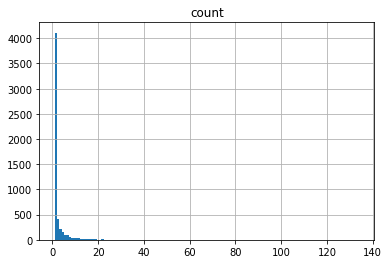

In [19]:
corpus = []
for ans in clean_student_ans:
    corpus.extend(ans)
tp = pd.DataFrame(collections.Counter(corpus),index=['count']).transpose()
tp.sort_values(by='count',ascending=False).hist(bins=130) # 사용된단어 개수 분포 : 1번 등장단어빈도가 매우 많다.

In [20]:
tp = tp.sort_values(by='count',ascending=False) # 사용된단어 5909 # corpus가 작다고 판단.
tp

,count
있다,134
에서,132
그들,127
한다,125
하는,124
...,...
두세트를,1
보여졌을,1
인종,1
차별에,1


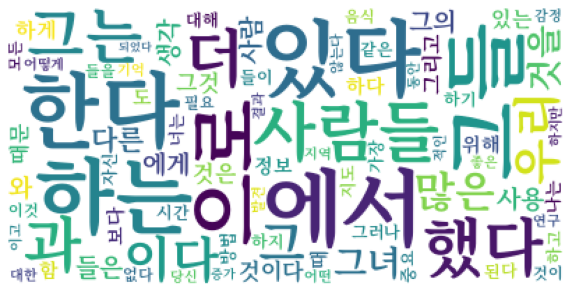

In [21]:
from wordcloud import WordCloud

wc = WordCloud(font_path='./MaruBuri-Bold.ttf',background_color="white", max_font_size=60, max_words=80)
cloud = wc.generate_from_frequencies(tp.to_dict()['count'])
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

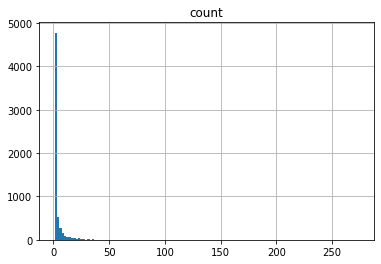

In [22]:
clean_teacher_ans = [cleaner(tokenizer(i)) for i in teacher['answer']]
corpus = []
for ans in clean_teacher_ans:
    corpus.extend(ans)
tp = pd.DataFrame(collections.Counter(corpus),index=['count']).transpose()
tp.sort_values(by='count',ascending=False).hist(bins=130)

In [23]:
tp = tp.sort_values(by='count',ascending=False)


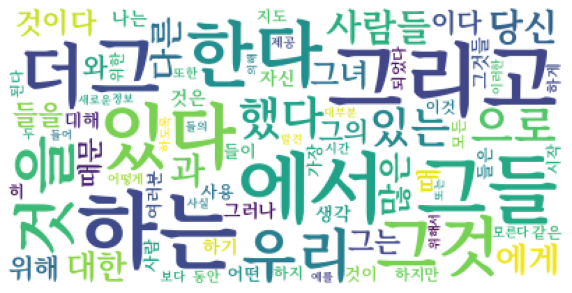

In [24]:
from wordcloud import WordCloud

wc = WordCloud(font_path='./MaruBuri-Bold.ttf',background_color="white", max_font_size=60, max_words=80)
cloud = wc.generate_from_frequencies(tp.to_dict()['count'])
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

           length      counts
count  110.000000  110.000000
mean    57.018182   15.763636
std     34.399430   15.636893
min      1.000000    1.000000
25%     28.250000    2.000000
50%     55.500000    8.000000
75%     82.750000   26.750000
max    136.000000   50.000000
           length      counts
count  141.000000  141.000000
mean    75.588652   12.297872
std     43.637315    9.485888
min      3.000000    1.000000
25%     39.000000    3.000000
50%     74.000000   10.000000
75%    109.000000   21.000000
max    188.000000   34.000000


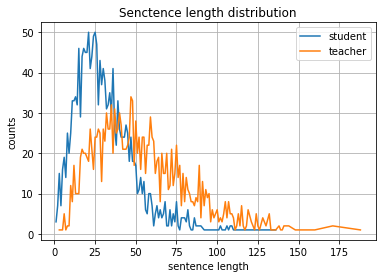

In [25]:
tp = collections.Counter([len(i)for i in student['answer']]) # 문장길이
df = pd.DataFrame([tp.keys(),tp.values()]).transpose()
df.columns = ['length','counts']
df = df.sort_values(by='length')
plt.plot(df['length'],df['counts'])

print(df.describe())

tp = collections.Counter([len(i)for i in teacher['answer']]) # 문장길이
df = pd.DataFrame([tp.keys(),tp.values()]).transpose()
df.columns = ['length','counts']
df = df.sort_values(by='length')
plt.plot(df['length'],df['counts'])

plt.grid()
plt.legend(['student','teacher'])
plt.xlabel('sentence length')
plt.ylabel('counts')
plt.title('Senctence length distribution')

print(df.describe())

# Translator

In [26]:
from googletrans import Translator
translator = Translator()

sents = list(student['answer'].str.replace('[^0-9가-힣ㄱ-ㅎㅏ-ㅣ]',' '))
ans = []
for sent in sents:
    try:
        tar = translator.translate(sent, dest="en") 
        ans.append(tar)
        print(tar)
    except:
        ans.append('')
ans

In [27]:
ans = [i.text for i in ans]
pd.DataFrame(ans).to_csv('./student_trans.csv')

# tf-idf part1

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
target = list(teacher['answer'].str.replace('[^0-9가-힣]',' '))
target.extend(list(student['answer'].str.replace('[^0-9가-힣]',' ')))

answer1 = pd.DataFrame()
answer1['st_answer'] = student['answer']
answer1['te_answer'] = teacher['answer']
answer1['label'] = student['label']

# 토크나이저, 스탑워드 사용
for j in range(1,4):
    tfidf = TfidfVectorizer(tokenizer=tokenizer,stop_words=stop_words,ngram_range=(j,j)).fit(target)
    st_vector = tfidf.transform(student['answer'])
    te_vector = tfidf.transform(teacher['answer'])
    scores = [float(cosine_similarity(st_vector[i],te_vector[i])) for i in range(len(answer1))]
    answer1[f'{j}gram'] = scores

In [29]:
answer1

,st_answer,te_answer,label,1gram,2gram,3gram
0,너는 농작물 밭에서 온도를 측정할 필요가 있다고 가정해라,당신이 농작물 밭에서 온도를 측정할 필요하다고 가정해보자,1,0.597323,0.361024,0.266093
1,지식에는 다른 종류가 있다,다른 종류의 지식이 있다,1,0.849498,0.235235,0.000000
2,왜일까,왜 그럴까,1,0.000000,0.000000,0.000000
3,너는 완벽할 수 있지만 그것을 생각하는 방식을 변화할 필요가 있다,여러분은 완벽할 수 있다 하지만 여러분은 그것 완벽함 에 대해 여러분이 생각하는 ...,1,0.484531,0.194241,0.081163
4,그는 유니크한 퍼포먼스 방법으로 알려져있는 바이올리니스트이자 작곡가였다,그는 그의 독특한 연주 방법으로 알려진 바이올리니스트이자 작곡가였다,1,0.538023,0.298015,0.111124
...,...,...,...,...,...,...
1729,또는 등장인물의 관점애서 난,또는 그 등장인물의 관점에서 나는 누구인가,1,0.482700,0.179716,0.000000
1730,얘,이 사람은 누구인가,1,0.000000,0.000000,0.000000
1731,만약 이야기하기에 한가지 비밀이 있다면 난 그게 이거라 믿는다,만약 이야기하는 일에 한 가지 비밀이 있다면 그렇다면 나는 그것이 이것이라고 ...,1,0.441797,0.180508,0.000000
1732,디에고,,1,0.000000,0.000000,0.000000


# tf-idf part2

In [30]:
trans = pd.read_csv('./student_trans.csv')
answer2 = pd.DataFrame()
answer2['trans_answer'] = trans['0'].str.replace('[^0-9a-zA-Z]',' ')
answer2['question'] = student['sentence'].str.replace('[^0-9a-zA-Z]',' ')
answer2['label'] = student['label']


target = list(answer2['question'])
target.extend(list(answer2['trans_answer']))

for j in range(1,4):
    tfidf = TfidfVectorizer(ngram_range=(j,j)).fit(target)
    st_vector = tfidf.transform(answer2['trans_answer'])
    te_vector = tfidf.transform(answer2['question'])
    scores = [float(cosine_similarity(st_vector[i],te_vector[i])) for i in range(len(answer2))]
    answer2[f'trans_{j}gram'] = scores

In [31]:
answer2

,trans_answer,question,label,trans_1gram,trans_2gram,trans_3gram
0,Suppose you need to measure the temperature in...,Suppose you need to measure the temperature in...,1,0.995607,0.850657,0.668330
1,There are different kinds of knowledge,There are different kinds of knowledge,1,1.000000,1.000000,1.000000
2,Why is it,Why,1,0.812342,0.000000,0.000000
3,You can be perfect but you need to change the...,You can be perfect but you need to change the...,1,1.000000,1.000000,1.000000
4,He was a violinist and composer known as a uni...,He was a violinist and composer known for his ...,1,0.938912,0.713160,0.552313
...,...,...,...,...,...,...
1729,Or is it because of the perspective of the cha...,Or from the perspective of the character Who...,1,0.691174,0.474348,0.379573
1730,His one,Who is this person,1,0.000000,0.000000,0.000000
1731,If I have a secret I believe that if I have a...,If there s a single secret to storytelling the...,1,0.554813,0.000000,0.000000
1732,Diego,Diego,1,1.000000,0.000000,0.000000


# RandomForest Classifier

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = pd.DataFrame()
train_data['1gram'] = answer1['1gram']
train_data['2gram'] = answer1['2gram']
train_data['3gram'] = answer1['3gram']
# train_data['4gram'] = answer1['4gram']


train_data['trans_1gram'] = answer2['trans_1gram']
train_data['trans_2gram'] = answer2['trans_2gram']
train_data['trans_3gram'] = answer2['trans_3gram']
# train_data['trans_4gram'] = answer2['trans_4gram']

train_label = answer2['label']


X_train,X_test,y_train,y_test = train_test_split(
    train_data,train_label,test_size=0.15,random_state=10
)

from sklearn.ensemble import RandomForestClassifier

bootstrap = []
for i in range(100): # 랜덤추출
    rf = RandomForestClassifier(random_state=i)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(pred,y_test)
    # print(acc)
    bootstrap.append(acc)

In [37]:
CI = pd.Series(bootstrap)
CI.describe()

count    100.000000
mean       0.751762
std        0.009500
min        0.727969
25%        0.747126
50%        0.750958
75%        0.758621
max        0.773946
dtype: float64

In [38]:
import scipy.stats

def conf_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [39]:
conf_interval(CI,confidence=0.95)

(0.7517624521072795, 0.7498775297879832, 0.7536473744265759)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = pd.DataFrame()
train_data['1gram'] = answer1['1gram']
train_data['2gram'] = answer1['2gram']
train_data['3gram'] = answer1['3gram']
# train_data['4gram'] = answer1['4gram']


train_data['trans_1gram'] = answer2['trans_1gram']
train_data['trans_2gram'] = answer2['trans_2gram']
train_data['trans_3gram'] = answer2['trans_3gram']
# train_data['trans_4gram'] = answer2['trans_4gram']

train_label = answer2['label']



from sklearn.ensemble import RandomForestClassifier

bootstrap = []
for i in range(100): # 랜덤추출
    X_train,X_test,y_train,y_test = train_test_split(
        train_data,train_label,test_size=0.15,random_state=i
    )
    rf = RandomForestClassifier(random_state=10)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    acc = accuracy_score(pred,y_test)
    # print(acc)
    bootstrap.append(acc)

In [41]:
CI = pd.Series(bootstrap)
CI.describe()

count    100.000000
mean       0.723142
std        0.025616
min        0.636015
25%        0.708812
50%        0.727969
75%        0.739464
max        0.785441
dtype: float64

In [42]:
conf_interval(CI,confidence=0.95)

(0.7231417624521073, 0.7180590040657217, 0.7282245208384929)

# grid_search_cv

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parms = {'n_estimators':list(range(100,200,10)),
         'max_depth':list(range(3,10))} # num of iter : using classifier
         # 'max_depth':list(range(5,11,5)),
         # 'min_samples_split':[2],
         # 'learning_rate': [0.1], # invalid ?
         # 'min_samples_leaf':[2]}


bootstrap = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(
        train_data,train_label,test_size=0.15,random_state=i
    )
    rf_clf = RandomForestClassifier(random_state=10,n_jobs=-1,verbose=True) # n_jobs ?
    grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=5,n_jobs=-1,scoring='accuracy')# ,param_grid=parms
    grid_cv.fit(X_train,y_train)

    # print(grid_cv.best_estimator_)
    # print(grid_cv.best_params_)
    # print(round(grid_cv.best_score_,4))
    pred = grid_cv.predict(X_test)
    acc = accuracy_score(pred,y_test)
    # print(acc)
    bootstrap.append(acc)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 130 out of 130 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 130 out of 130 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parall

In [44]:
CI = pd.Series(bootstrap)
CI.describe()

count    100.000000
mean       0.738123
std        0.023267
min        0.659004
25%        0.724138
50%        0.739464
75%        0.754789
max        0.789272
dtype: float64

In [45]:
conf_interval(CI,confidence=0.95)

(0.7381226053639846, 0.733506006951754, 0.742739203776215)

# Fasttext

In [ ]:
# from gensim.models.word2vec import Word2Vec
# from gensim.models.fasttext import FastText
# import pandas as pd

In [ ]:
# def corpus_init():
#     f = open("./corpus_target.txt", 'w',encoding='utf8')
#     f.write('')
#     f.close()

# def corpus_save(target):
#     save = '\n'.join(target)
#     f = open("./corpus_target.txt", 'a',encoding='utf8')
#     f.write(save)
#     f.close()

# def return_tokenizer():
#     corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
#     noun_extractor = LRNounExtractor_v2(verbose=True) # n_gram?
#     nouns = noun_extractor.train_extract(corpus)
#     scores = {word:score.score for word, score in nouns.items()}
#     tokenizer = LTokenizer(scores=scores)
#     return tokenizer

In [ ]:
# student = pd.read_csv('./student_sentence_data.csv')
# teacher = pd.read_csv('./teacher_sentence_data.csv')
# trans = pd.read_csv('./student_trans.csv')

In [ ]:
# conf = pd.DataFrame()
# conf['question'] = student['sentence'].str.replace('[^a-zA-Z]',' ')
# conf['st_trans'] = trans['0'].str.replace('[^a-zA-Z]',' ')
# conf['st_ans'] = student['answer'].str.replace('[^가-힣]',' ')
# conf['te_ans'] = teacher['answer'].str.replace('[^가-힣]',' ')
# conf['label'] = student['label']

In [ ]:
# corpus_init()
# corpus_save(conf['te_ans'])

In [ ]:
# model = FastText(vector_size=20) 
# model.build_vocab(corpus_file='./corpus_target.txt')
# model.train(
#     corpus_iterable=pd.Series([i.split() for i in conf['st_ans']]),
#     epochs=5,
#     total_examples=model.corpus_count,
#     total_words=model.corpus_total_words
# )

In [ ]:
# conf['similar'] = [model.wv.similarity(conf.loc[i,'st_ans'],conf.loc[i,'te_ans']) for i in range(len(conf))]

---

In [ ]:
# corpus_init()
# corpus_save(conf['question'])

In [ ]:
# model = FastText(vector_size=20) 
# model.build_vocab(corpus_file='./corpus_target.txt')
# model.train(
#     corpus_iterable=pd.Series([i.split() for i in conf['st_trans']]),
#     epochs=5,
#     total_examples=model.corpus_count,
#     total_words=model.corpus_total_words
# )

In [ ]:
# conf['similar_en'] = [model.wv.similarity(conf.loc[i,'question'],conf.loc[i,'st_trans']) for i in range(len(conf))]

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# X_train,X_test,y_train,y_test = train_test_split(
#     conf.loc[:,['similar','similar_en']],conf['label'],test_size=0.3,random_state=10
# )

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state=12)
# rf.fit(X_train,y_train)
# pred = rf.predict(X_test)
# acc = accuracy_score(pred,y_test)
# print(acc)